# In-Class Exercise: Implementing K-Means by Hand

The `sklearn` package has excellent routines to perform k-means.  But, it is useful to implement it by hand to understand the algorithm.  We will do a simple implementation here.  We first download some packages.

In [87]:
import numpy as np
import matplotlib.pyplot as plt

To demonstrate the algorithm, we generate some synthetic data.  You do not need to modify this part of the program.

In [88]:
n = 500
p0 = 0.5
d = 2
nc = 3
mu_true = np.array([[0,0], [1,2], [1.5,-0.5]])
A = np.zeros((d,d,nc))
A[:,:,0] = 0.3*np.array([[1,0], [0,2]])
A[:,:,1] = 0.5*np.array([[1,-0.5], [-0.5,1]])
A[:,:,2] = 0.4*np.array([[1,0.5], [0.5,1]])
u = np.random.randint(nc, size=n)


Z = np.random.normal(0,1,(n,d))
X = np.zeros((n,d))
for i in range(nc):
    I = np.where(u == i)[0]
    X[I,:] = Z[I,:].dot(A[:,:,i]) + mu_true[i,:][None,:]

Create a scatter plot of the data.  You should visually see three clusters.

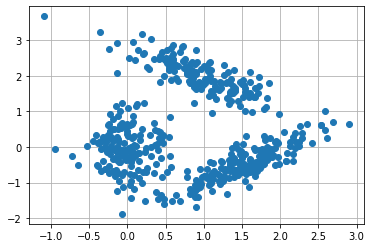

In [89]:
# TODO
plt.plot(X[:,0], X[:,1], 'o')
plt.grid()

For the k-means algorithm use the following initial cluster centers.  These are not the best initial conditions, but they are good to illustrate the algorithm.  Plot the cluster centers on top of the data.  Use the `plt.plot()` with `ms=10` and `'ro'` format

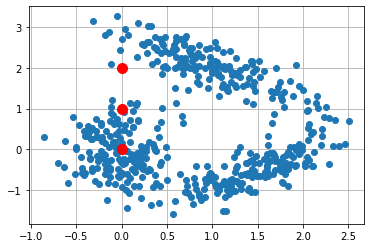

In [78]:
mu = np.array([[0,0], [0,1], [0,2]], dtype=float)

# TODO
plt.plot(X[:,0], X[:,1], 'o')
plt.plot(mu[:,0], mu[:,1], 'ro', ms=10)
plt.grid()

Now perform the nearest neighbor step:
*  Compute the squared distance from the points to the cluster center:
      
      `dsq[i,j] = sum_k (X[i,k] - mu[j,k])**2`
   
   You should do this with broadcasting
*  Select the cluster assignments `c[i] = argmin_j dsq[i,j]`

In [79]:
# TODO
#  dsq = ...
#  c = ...
D = X[:,None,:] - mu[None,:,:]
dsq = np.sum(D**2, axis=2)
c = np.argmin(dsq, axis=1)

Plot the cluster assignments using a scatter plot with different colors for each cluster.  Also plot the cluster centers.

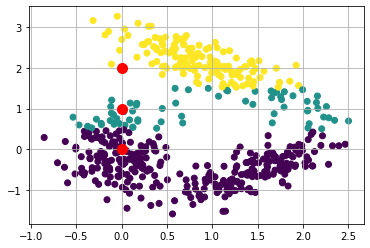

In [80]:
# TODO
#  plt.scatter(...)
plt.scatter(X[:,0], X[:,1], c=c)
plt.plot(mu[:,0], mu[:,1], 'ro', ms=10)
plt.grid()

Next perform the centroid update step.  For each cluster `i`:
*  Find the set of indices `I` where `c==i`
*  Set `mu[i,:]` to the mean of the values in `X[I,:]`

Plot the new cluster centers.

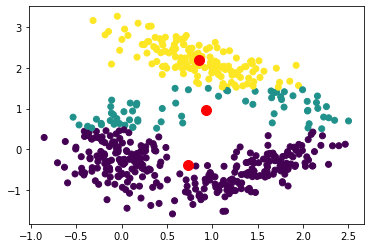

In [81]:
# TODO
#  mu = ...
mu = np.zeros((nc,d))
for i in range(nc):
    I = np.where(c == i)[0]
    mu[i,:] = np.mean(X[I,:], axis=0)
    
plt.scatter(X[:,0], X[:,1], c=c)
plt.plot(mu[:,0], mu[:,1], 'ro', ms=10)


Complete the function below that runs `nit` iterations of k-means from an initial condition `mu_init`.

In [83]:
def kmeans(X,mu_init,nit):

    # Get dimensions
    nc, d = mu_init.shape
    
    # Set the initial cluster centers
    mu = mu_init
    
    # TODO    
    for it in range(nit):
        # Nearest neighbor step
        D = X[:,None,:] - mu[None,:,:]
        dsq = np.sum(D**2, axis=2)
        c = np.argmin(dsq, axis=1)
        
        # Centroid step
        mu = np.zeros((nc,d))
        for i in range(nc):
            I = np.where(c == i)[0]
            mu[i,:] = np.mean(X[I,:], axis=0)
    
    return c, mu
        
    

Run the code on the data for 5 iterations.  Plot the results.

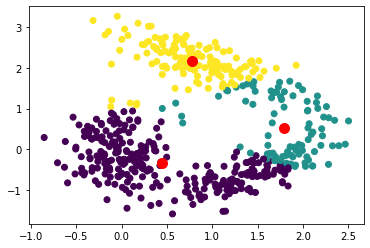

In [86]:
mu_init = np.array([[0,0], [0,1], [0,2]], dtype=float)
nit = 5

# TODO
#   c, mu = kmeans(X,mu_init,nit)

c, mu = kmeans(X,mu_init,nit)
plt.scatter(X[:,0], X[:,1], c=c)
plt.plot(mu[:,0], mu[:,1], 'ro', ms=10)